In [1]:
# All imports required
import os
import urllib3
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Check if dataset is already present in project directory, else download from UCI repository
if not os.path.exists('wine.data'):
    http = urllib3.PoolManager()
    url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
    r = http.request('GET', url)
    with open('wine.data', 'wb') as f:
        f.write(r.data)
        r.status

In [3]:
# Load dataset into dataframe
feature_names = ['Winery', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols',
                 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue',
                 'OD280/OD315 of diluted wines', 'Proline']
df = pd.read_csv('wine.data', header=None, names = feature_names, index_col=None)
df.head()

,Winery,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
# Split dataframe into data and target
target = df['Winery']
data = df.drop(['Winery'], axis='columns')

In [5]:
# View top 5 rows of data
data.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
# View top 5 rows of target
target.head()

0    1
1    1
2    1
3    1
4    1
Name: Winery, dtype: int64

In [7]:
# Split data and target into training sets and test sets
data_train, data_test, target_train, target_test = train_test_split(data, target)
print('Dimensions of data_train: {}'.format(data_train.shape))
print('Dimensions of data_test: {}'.format(data_test.shape))
print('Dimensions of target_train: {}'.format(target_train.shape))
print('Dimensions of target_test: {}'.format(target_test.shape))

Dimensions of data_train: (133, 13)
Dimensions of data_test: (45, 13)
Dimensions of target_train: (133,)
Dimensions of target_test: (45,)


In [8]:
# Fit the training data into KNN algorithm with k = 1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(data_train, target_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [9]:
# Calculate Accuracy of prediction
knn.score(data_test, target_test)

0.7333333333333333

In [10]:
# Calculate Accuracy using k = 3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(data_train, target_train)
knn.score(data_test, target_test)

0.6888888888888889

[1, 10, 0.5, 1]

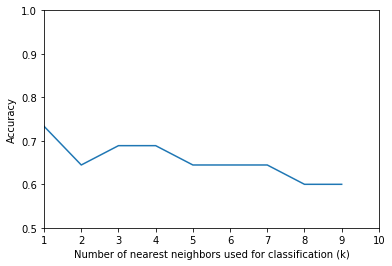

In [11]:
# Plot accuracy vs different values for k from 1 to 10
scores = {}
for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(data_train, target_train)
    scores[i] = knn.score(data_test, target_test)
plt.plot(scores.keys(), scores.values())
plt.xlabel('Number of nearest neighbors used for classification (k)')
plt.ylabel('Accuracy')
plt.axis([1, 10, 0.5, 1])

In [12]:
sorted_scores = sorted(scores.items(), reverse=True, key=lambda x: x[1])
print('Maximum accuracy of {} observed for k = {}'.format(sorted_scores[0][1], sorted_scores[0][0]))

Maximum accuracy of 0.7333333333333333 observed for k = 1
